In [27]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import quantity_support

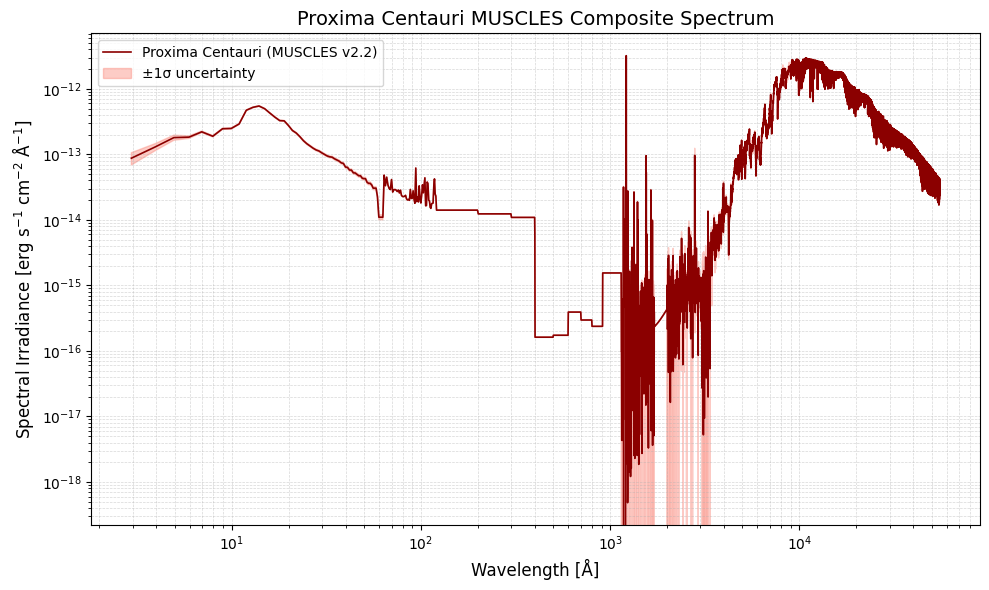

In [29]:
# Optional: Better plot formatting for astropy units
quantity_support()

# Load the MUSCLES spectrum file
# filename = "hlsp_muscles_multi_multi_gj551_broadband_v22_adapt-const-res-sed.fits"
filename=".\MAST_2025-07-02T1453\HLSP\hlsp_muscles_gj551\hlsp_muscles_multi_multi_gj551_broadband_v22_adapt-const-res-sed.fits"
hdulist = fits.open(filename)
data = hdulist[1].data

# Extract wavelength and flux
wavelength = data['WAVELENGTH']      # in Angstroms
flux = data['FLUX']                  # in erg s^-1 cm^-2 Å^-1
uncertainty = data['ERROR']          # optional: uncertainty values

# Plot settings similar to Rimmer et al. 2018 Supplement
plt.figure(figsize=(10, 6))

# Plot spectrum
plt.plot(wavelength, flux, label='Proxima Centauri (MUSCLES v2.2)', color='darkred', lw=1.2)

# Optionally: plot uncertainty as shaded region
plt.fill_between(wavelength, flux - uncertainty, flux + uncertainty,
                 color='salmon', alpha=0.4, label='±1σ uncertainty')

# Axis settings (log-log)
plt.xscale('log')
plt.yscale('log')

# Axis labels
plt.xlabel("Wavelength [Å]", fontsize=12)
plt.ylabel("Spectral Irradiance [erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$]", fontsize=12)
plt.title("Proxima Centauri MUSCLES Composite Spectrum", fontsize=14)

# Grid and legend
plt.grid(True, which="both", ls="--", lw=0.5, alpha=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

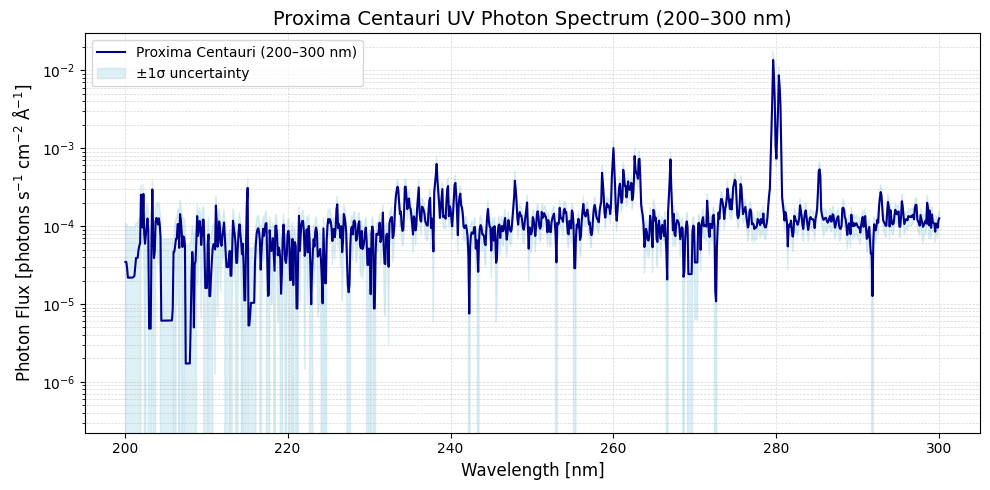

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.constants import h, c
import astropy.units as u

# Load MUSCLES spectrum
# filename = "hlsp_muscles_multi_multi_gj551_broadband_v22_adapt-const-res-sed.fits"
hdulist = fits.open(filename)
data = hdulist[1].data

# Extract wavelength and flux
wavelength_angstrom = data['WAVELENGTH']                  # in Å
flux_erg = data['FLUX']                                   # in erg s^-1 cm^-2 Å^-1
uncertainty_erg = data['ERROR']

# Convert wavelength to nm and cm
wavelength_nm = wavelength_angstrom / 10.0
wavelength_cm = wavelength_angstrom * 1e-8

# Convert energy flux to photon flux (photons s^-1 cm^-2 Å^-1)
# Photon flux = (flux * wavelength) / (h * c)
hc = (h * c).to('erg * cm')  # erg·cm
photon_flux = (flux_erg * wavelength_cm) / hc.value
photon_uncertainty = (uncertainty_erg * wavelength_cm) / hc.value

# Filter for 200–300 nm
mask = (wavelength_nm >= 200) & (wavelength_nm <= 300)
wavelength_plot = wavelength_nm[mask]
photon_flux_plot = photon_flux[mask]
photon_uncertainty_plot = photon_uncertainty[mask]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(wavelength_plot, photon_flux_plot, color='darkblue', label='Proxima Centauri (200–300 nm)')
plt.fill_between(wavelength_plot,
                 photon_flux_plot - photon_uncertainty_plot,
                 photon_flux_plot + photon_uncertainty_plot,
                 color='lightblue', alpha=0.4, label='±1σ uncertainty')

# Axes and labels
plt.xlabel("Wavelength [nm]", fontsize=12)
plt.ylabel("Photon Flux [photons s$^{-1}$ cm$^{-2}$ Å$^{-1}$]", fontsize=12)
plt.title("Proxima Centauri UV Photon Spectrum (200–300 nm)", fontsize=14)
plt.yscale("log")
plt.grid(True, which="both", ls="--", lw=0.5, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

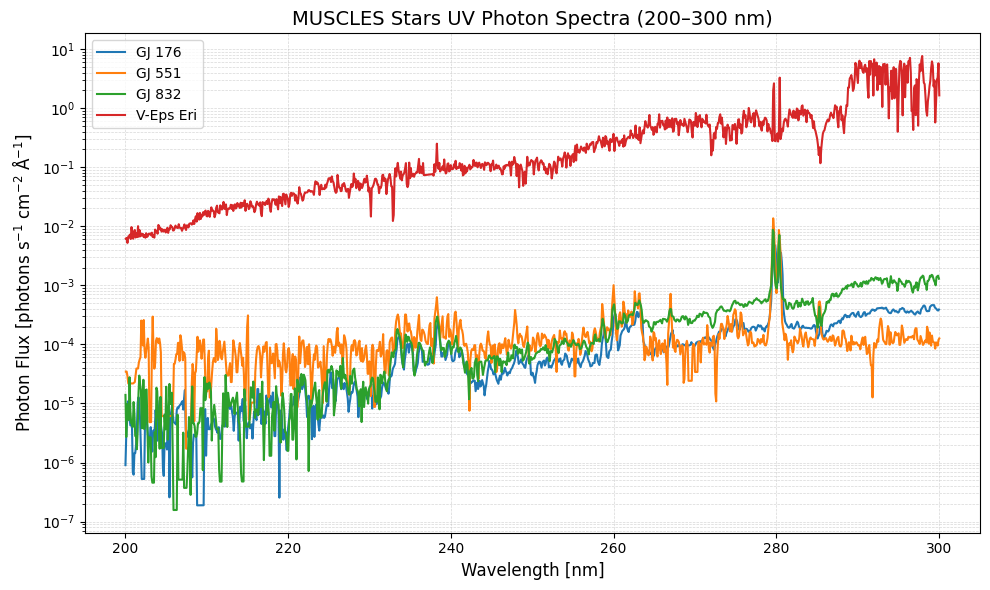

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.constants import h, c
import os

# Define folders and corresponding FITS filenames
folder = '.\MAST_2025-07-02T1533\HLSP'
star_info = {
    "GJ 176": f"{folder}\hlsp_muscles_gj176/hlsp_muscles_multi_multi_gj176_broadband_v22_adapt-const-res-sed.fits",
    "GJ 551": f"{folder}\hlsp_muscles_gj551/hlsp_muscles_multi_multi_gj551_broadband_v22_adapt-const-res-sed.fits",
    "GJ 832": f"{folder}\hlsp_muscles_gj832/hlsp_muscles_multi_multi_gj832_broadband_v22_adapt-const-res-sed.fits",
    "V-Eps Eri": f"{folder}\hlsp_muscles_v-eps-eri/hlsp_muscles_multi_multi_v-eps-eri_broadband_v22_adapt-const-res-sed.fits"
}

# Physical constant
hc = (h * c).to('erg * cm').value  # erg·cm

# Initialize plot
plt.figure(figsize=(10, 6))

# Loop through each star
for label, filepath in star_info.items():
    if not os.path.isfile(filepath):
        print(f"File not found: {filepath}")
        continue

    with fits.open(filepath) as hdulist:
        data = hdulist[1].data
        wavelength_angstrom = data['WAVELENGTH']
        flux_erg = data['FLUX']
        uncertainty_erg = data['ERROR']

        wavelength_nm = wavelength_angstrom / 10.0
        wavelength_cm = wavelength_angstrom * 1e-8

        # Convert energy flux to photon flux
        photon_flux = (flux_erg * wavelength_cm) / hc
        photon_uncertainty = (uncertainty_erg * wavelength_cm) / hc

        # Filter to 200–300 nm
        mask = (wavelength_nm >= 200) & (wavelength_nm <= 300)
        wl = wavelength_nm[mask]
        pf = photon_flux[mask]
        pf_err = photon_uncertainty[mask]

        # Plot
        plt.plot(wl, pf, label=label)
        # plt.fill_between(wl, pf - pf_err, pf + pf_err, alpha=0.3)

# Formatting
plt.xlabel("Wavelength [nm]", fontsize=12)
plt.ylabel("Photon Flux [photons s$^{-1}$ cm$^{-2}$ Å$^{-1}$]", fontsize=12)
plt.title("MUSCLES Stars UV Photon Spectra (200–300 nm)", fontsize=14)
plt.yscale("log")
plt.grid(True, which="both", ls="--", lw=0.5, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()



./irradiance_scaling\20250626_maya_irradiance_AbsoluteIrradiance_FlareLab_15-59-21-999.txt
./irradiance_scaling\AbsoluteIrradiance_D2lamp_18-39-34-948.txt
./irradiance_scaling\FlareLab_AbsoluteSpectrum_26052025_AbsoluteIrradiance_13-14-57-397.txt


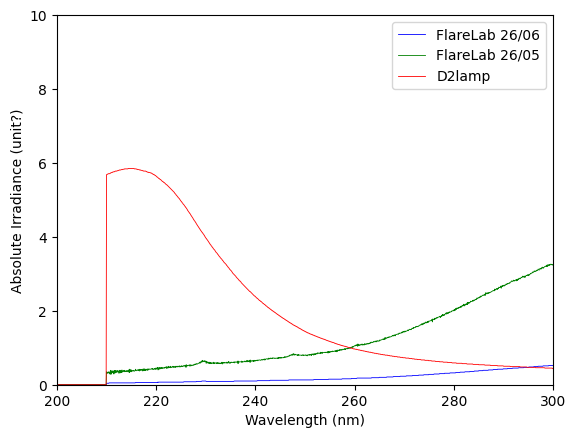

In [33]:
skip = 40

for file in glob.glob('./irradiance_scaling/*.txt'): 
    print(file)
    # if "FlareLab" and '20250626' in file:
        # x, absirr_flarelab_recent = np.loadtxt(file,skiprows=skip,usecols=(0,1),unpack=True)
    # if "FlareLab" and '26052025' in file:
        # x, absirr_flarelab_old = np.loadtxt(file,skiprows=skip,usecols=(0,1),unpack=True)
    if "D2lamp" in file:
        x, absirr_d2 = np.loadtxt(file,skiprows=skip,usecols=(0,1),unpack=True)
    # print(f"Background: {file}, I_background.shape = {I_background.shape}")
    
        
plt.plot(x, absirr_flarelab_recent,'b-', lw=0.6, label='FlareLab 26/06')
plt.plot(x, absirr_flarelab_old,'g-', lw=0.6, label='FlareLab 26/05')
plt.plot(x, absirr_d2 ,'r-', lw=0.6, label='D2lamp')

plt.xlim(200,300)
plt.xlabel('Wavelength (nm)')
plt.ylim(0,10)
plt.ylabel('Absolute Irradiance (unit?)')
plt.legend()